In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [2]:
training_df = pd.read_csv("../Resources/train_allvalues.csv")
training_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,none,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,none,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,none,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,none,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,none,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,none,0,8,2007,WD,Normal,175000
1408,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,2,2010,WD,Normal,210000
1409,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,GdPrv,2500,5,2010,WD,Normal,266500
1410,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,none,0,4,2010,WD,Normal,142125


In [3]:
#create lists of all years, zones, street type, sale type. Will use for loops later 
years = []
for x in training_df['YrSold']:
    if x not in years:
        years.append(x)

for x in range (len(years)):
    print(years[x])
    
print(f"========================")
        
zones = []
for x in training_df['MSZoning']:
    if x not in zones:
        zones.append(x)
        
for x in range (len(zones)):
    print(zones[x])

print(f"========================")

saletypes = []

for x in training_df['SaleType']:
    if x not in saletypes:
        saletypes.append(x)
        
for x in range (len(saletypes)):
    print(saletypes[x])

2008
2007
2006
2009
2010
RL
RM
C (all)
FV
RH
WD
New
COD
ConLD
ConLI
CWD
ConLw
Con
Oth


In [4]:
early = [2006]
firstyear = training_df.loc[training_df['YrSold'].isin(early)]
firstyear

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,none,0,2,2006,WD,Abnorml,140000
11,12,60,RL,85.0,11924,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,none,0,7,2006,New,Partial,345000
19,21,60,RL,101.0,14215,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,none,0,11,2006,New,Partial,325300
27,29,20,RL,47.0,16321,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,none,0,12,2006,WD,Normal,207500
34,36,60,RL,108.0,13418,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,none,0,9,2006,WD,Normal,309000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,1431,60,RL,60.0,21930,Pave,IR3,Lvl,AllPub,Inside,...,0,0,0,none,0,7,2006,WD,Normal,192140
1386,1435,20,RL,80.0,17400,Pave,Reg,Low,AllPub,Inside,...,0,0,0,none,0,5,2006,WD,Normal,160000
1401,1450,180,RM,21.0,1533,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,none,0,8,2006,WD,Abnorml,92000
1404,1453,180,RM,35.0,3675,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,none,0,5,2006,WD,Normal,145000


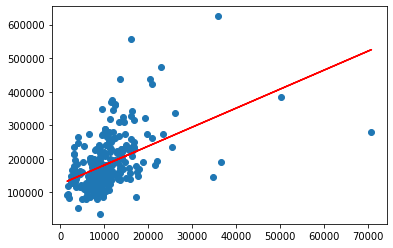

The correlation coefficient is 0.47163004380496404.


In [11]:
x_values = firstyear['LotArea']
y_values = firstyear['SalePrice']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel=('Sale Price')
plt.xlabel=('Lot Area')
correlation = y_values.corr(x_values)
plt.show()
print("The correlation coefficient is " + str(correlation) +".")
#Plot in Plotly

Isolating for an individual year, there is not a strong correlation between lot size and value

          SalePrice
MSZoning           
FV         207900.0
RL         175000.0
RH         133000.0
RM         122000.0
C (all)     74700.0


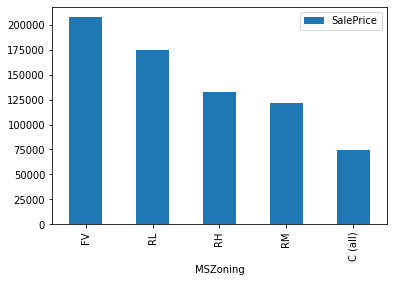

In [6]:
#find median property values for each zone, more accurate than mean (https://realestate.wichita.edu/question/median-vs-average/)
RL_mean = training_df.groupby('MSZoning').median()['SalePrice']

meanzoneprice = pd.DataFrame(RL_mean).sort_values(by="SalePrice", ascending=False)
print(meanzoneprice)
meanzoneprice.plot(kind='bar')
plt.show()
#this plot is worth charting in Plotly

 A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

          SalePrice
SaleType           
Con        269600.0
New        248328.0
CWD        188750.0
WD         159975.0
ConLw      144000.0
COD        139000.0
ConLD      132500.0
ConLI      125000.0
Oth        116050.0


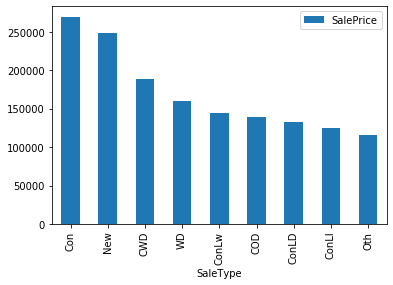

In [7]:
saletype_median = training_df.groupby('SaleType').median()['SalePrice']

salestypemedian = pd.DataFrame(saletype_median).sort_values(by="SalePrice", ascending=False)
print(salestypemedian)
salestypemedianplot = salestypemedian.plot(kind='bar')
display(salestypemedianplot)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other	

           SalePrice
LotConfig           
CulDSac     207500.0
FR3         195450.0
FR2         165000.0
Corner      161000.0
Inside      160000.0


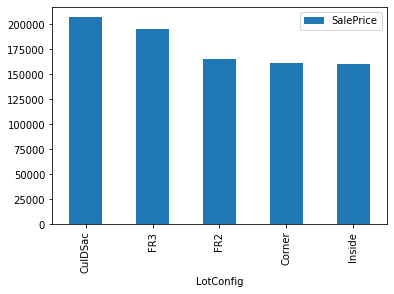

In [8]:
lotconfig_median = training_df.groupby('LotConfig').median()['SalePrice']

lotconfig_median_df = pd.DataFrame(lotconfig_median).sort_values(by="SalePrice", ascending=False)
print(lotconfig_median_df)
lotconfigmedian_plot = lotconfig_median_df.plot(kind='bar')
display(lotconfigmedian_plot)

LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

In [9]:
display(training_df['Neighborhood'])

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
1407    Gilbert
1408     NWAmes
1409    Crawfor
1410      NAmes
1411    Edwards
Name: Neighborhood, Length: 1412, dtype: object

              SalePrice
Neighborhood           
NridgHt        315000.0
NoRidge        301500.0
StoneBr        278000.0
Timber         228950.0
Somerst        226700.0
Veenker        218000.0
Crawfor        208550.0
ClearCr        200500.0
CollgCr        197200.0
Blmngtn        191000.0
SawyerW        183500.0
NWAmes         182900.0
Gilbert        181000.0
Mitchel        156000.0
NPkVill        146000.0
NAmes          141000.0
SWISU          139500.0
Blueste        137500.0
Sawyer         135000.0
BrkSide        127000.0
Edwards        126000.0
OldTown        119900.0
BrDale         106000.0
IDOTRR         104750.0
MeadowV         88000.0


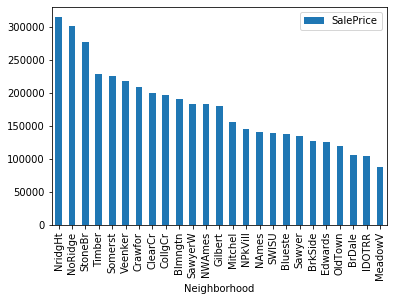

In [10]:
neighborhood_median = training_df.groupby('Neighborhood').median()['SalePrice']

neighborhood_median_df = pd.DataFrame(neighborhood_median).sort_values(by="SalePrice", ascending=False)
print(neighborhood_median_df)
neighborhood_median_plot = neighborhood_median_df.plot(kind='bar')
display(neighborhood_median_plot)

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
